In [1]:
import os
os.chdir('/depot/pbaloni/data/Lab_members/Purba_Mandal/Proteomics/Brain_regions/ML_data/Aggregated_data/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset
matrix = pd.read_csv('Aggregated_expression_matrix.csv', index_col=0)
print(matrix.head())
print(matrix.shape) 

      banner.b01.127N  banner.b01.127C  banner.b01.128C  banner.b01.129N  \
0           -0.120372        -0.025527        -0.036742        -0.376483   
A1BG         0.149761         0.588713         0.385120         0.107409   
A2M          0.180289         0.201131         0.214245        -0.276771   
AAAS        -0.023247        -0.089330         0.095123         0.086997   
AACS         0.126535         0.037998         0.225111         0.072267   

      banner.b01.129C  banner.b01.130N  banner.b01.130C  banner.b01.131N  \
0           -0.330522        -0.283194        -0.145036        -0.210332   
A1BG        -0.010089        -0.064007         0.321600         0.232766   
A2M         -0.328574        -0.037545        -0.150133        -0.309945   
AAAS         0.119807        -0.072071         0.080561         0.111129   
AACS         0.161837         0.230707         0.061908         0.003557   

      banner.b02.127N  banner.b02.129C  ...  rosmap.b49.129N  rosmap.b49.130N  \
0    

In [3]:
# Diagnosis data
diagnosis = pd.read_csv('Final_metadata.csv')
print(diagnosis.head())
print(diagnosis.shape)

         sample_id diagnosis
0  banner.b01.127N    AsymAD
1  banner.b01.127C        AD
2  banner.b01.128C    AsymAD
3  banner.b01.129N   Control
4  banner.b01.129C        AD
(488, 2)


In [4]:
# Keep only AsymAD and AD samples
diagnosis = diagnosis[diagnosis['diagnosis'].isin(['AsymAD', 'AD'])]

print(diagnosis.shape)
print(diagnosis.head())


(382, 2)
         sample_id diagnosis
0  banner.b01.127N    AsymAD
1  banner.b01.127C        AD
2  banner.b01.128C    AsymAD
4  banner.b01.129C        AD
5  banner.b01.130N    AsymAD


In [5]:
# Align expression matrix to just AsymAD and AD samples
# Get sample IDs (which match matrix column names)
sample_ids = diagnosis['sample_id'].tolist()
sample_ids




['banner.b01.127N',
 'banner.b01.127C',
 'banner.b01.128C',
 'banner.b01.129C',
 'banner.b01.130N',
 'banner.b01.130C',
 'banner.b01.131N',
 'banner.b02.127N',
 'banner.b02.130N',
 'banner.b02.130C',
 'banner.b02.131N',
 'banner.b03.127C',
 'banner.b03.128N',
 'banner.b03.128C',
 'banner.b03.129N',
 'banner.b03.130N',
 'banner.b03.130C',
 'banner.b03.131N',
 'banner.b04.127C',
 'banner.b04.128N',
 'banner.b04.128C',
 'banner.b04.129C',
 'banner.b04.131N',
 'banner.b05.127N',
 'banner.b05.127C',
 'banner.b05.128C',
 'banner.b05.129N',
 'banner.b05.129C',
 'banner.b05.130N',
 'banner.b05.131N',
 'banner.b06.127N',
 'banner.b06.127C',
 'banner.b06.128N',
 'banner.b06.128C',
 'banner.b06.129N',
 'banner.b06.130N',
 'banner.b06.130C',
 'banner.b06.131N',
 'banner.b07.127N',
 'banner.b07.127C',
 'banner.b07.128C',
 'banner.b07.130C',
 'banner.b08.127C',
 'banner.b08.128C',
 'banner.b08.130N',
 'banner.b08.130C',
 'banner.b08.131N',
 'banner.b09.127N',
 'banner.b09.128C',
 'banner.b09.129N',


In [6]:
# Subset expression matrix columns
matrix_subset = matrix[sample_ids]
# Confirm shape
print(matrix_subset.shape)
print(matrix_subset.head())
matrix = matrix_subset

(7858, 382)
      banner.b01.127N  banner.b01.127C  banner.b01.128C  banner.b01.129C  \
0           -0.120372        -0.025527        -0.036742        -0.330522   
A1BG         0.149761         0.588713         0.385120        -0.010089   
A2M          0.180289         0.201131         0.214245        -0.328574   
AAAS        -0.023247        -0.089330         0.095123         0.119807   
AACS         0.126535         0.037998         0.225111         0.161837   

      banner.b01.130N  banner.b01.130C  banner.b01.131N  banner.b02.127N  \
0           -0.283194        -0.145036        -0.210332        -0.080427   
A1BG        -0.064007         0.321600         0.232766         0.442322   
A2M         -0.037545        -0.150133        -0.309945        -0.014113   
AAAS        -0.072071         0.080561         0.111129              NaN   
AACS         0.230707         0.061908         0.003557         0.280531   

      banner.b02.130N  banner.b02.130C  ...  rosmap.b48.130N  rosmap.b49.1

In [7]:
# Load mitochondrial protein list
with open("/depot/pbaloni/data/Lab_members/Purba_Mandal/PFC_MIT_data/DEG_results/mito.txt", "r") as f:
    mito_proteins = [line.strip() for line in f if line.strip()]

# Step 3: Subset matrix using mito protein names (matching row index)
matrix_mito = matrix[matrix.index.isin(mito_proteins)]

# Step 4: Save subset to CSV
matrix_mito.to_csv("subset_mito_expression_matrix.csv")

# Step 5: Confirm shape
print(f"Subset shape: {matrix_mito.shape}")
matrix_mito.head()


Subset shape: (836, 382)


,banner.b01.127N,banner.b01.127C,banner.b01.128C,banner.b01.129C,banner.b01.130N,banner.b01.130C,banner.b01.131N,banner.b02.127N,banner.b02.130N,banner.b02.130C,...,rosmap.b48.130N,rosmap.b49.127N,rosmap.b49.128N,rosmap.b49.128C,rosmap.b49.129N,rosmap.b49.130C,rosmap.b50.127C,rosmap.b50.129N,rosmap.b50.130N,rosmap.b50.130C
AADAT,-0.028409,0.019954,0.064430,0.097563,0.181716,0.120162,0.090520,-0.039059,0.092090,0.228769,...,0.010611,-0.141476,0.030221,0.067997,-0.141931,0.003297,NaN,NaN,NaN,NaN
AARS2,-0.277493,-0.193922,-0.229795,-0.193732,-0.085776,-0.219111,-0.205736,-0.275703,-0.179586,-0.263642,...,-0.173790,-0.121331,-0.202890,-0.219673,-0.165193,-0.327456,-0.296021,-0.174231,-0.207223,-0.223817
AASS,-0.085898,-0.058107,0.327387,0.044070,0.039894,0.014542,0.091753,0.038739,0.035687,0.061624,...,-0.207113,-0.015421,-0.075501,0.182171,-0.092385,0.025166,0.188040,-0.225469,-0.131940,-0.029957
ABAT,-0.179176,-0.299813,-0.119406,-0.149007,-0.077588,-0.198614,-0.147735,-0.207593,-0.058035,-0.226362,...,-0.289480,-0.112108,-0.194343,-0.320765,-0.145551,-0.266494,-0.218926,-0.142491,-0.010083,-0.140462
ABCB10,0.021724,-0.020237,-0.018455,-0.073530,-0.087013,0.038974,0.010636,-0.042292,0.074615,-0.042227,...,-0.037045,0.196752,-0.120309,0.019364,0.099314,-0.053589,-0.106466,0.071746,-0.062122,-0.082460


In [8]:
# Load the list of proteins 
de_proteins = pd.read_csv("/depot/pbaloni/data/Lab_members/Purba_Mandal/Proteomics/Brain_regions/ML_data/DE_limma_proteins_AsymAD_vs_AD_cell_correction.csv")
de_proteins



,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,protein
0,NRN1,0.158166,-0.133874,8.583068,2.430000e-16,1.910000e-12,26.456979,NRN1
1,PLCL2,0.051769,-0.061751,8.275067,2.230000e-15,8.760000e-12,24.289268,PLCL2
2,PLXNA3,0.056868,-0.109241,7.929273,2.510000e-14,6.580000e-11,21.921176,PLXNA3
3,GNAI1,0.054621,-0.037483,7.621012,2.050000e-13,4.030000e-10,19.871059,GNAI1
4,SPOCK2,-0.106614,0.360878,-7.561997,3.040000e-13,4.780000e-10,19.485320,SPOCK2
...,...,...,...,...,...,...,...,...
1752,GBE1,-0.021775,0.211229,-2.558088,1.091423e-02,4.892413e-02,-3.730312,GBE1
1753,ARFGAP3,-0.018486,0.128290,-2.553061,1.107025e-02,4.959521e-02,-3.742859,ARFGAP3
1754,CPLX1,0.042511,-0.053175,2.552837,1.107726e-02,4.959833e-02,-3.743418,CPLX1
1755,PCM1,0.042368,-0.112984,2.551465,1.112021e-02,4.976229e-02,-3.746838,PCM1


In [9]:
# Subsetting DE proteins
protein_list = de_proteins['protein'].tolist()
len(protein_list)



1757

In [10]:
# Subset the matrix
matrix_mito_DEG = matrix_mito[matrix_mito.index.isin(protein_list)]
# Print shape to confirm
print(matrix_mito_DEG.shape)
print(matrix_mito_DEG.head())

(258, 382)
        banner.b01.127N  banner.b01.127C  banner.b01.128C  banner.b01.129C  \
AADAT         -0.028409         0.019954         0.064430         0.097563   
ABCB10         0.021724        -0.020237        -0.018455        -0.073530   
ABHD10        -0.201630        -0.237428        -0.255462        -0.154877   
ACADSB        -0.454619        -0.514162        -0.364330        -0.569829   
ACADVL        -0.392488        -0.261782        -0.216735        -0.218404   

        banner.b01.130N  banner.b01.130C  banner.b01.131N  banner.b02.127N  \
AADAT          0.181716         0.120162         0.090520        -0.039059   
ABCB10        -0.087013         0.038974         0.010636        -0.042292   
ABHD10        -0.284435        -0.070419        -0.151208        -0.260787   
ACADSB        -0.318316        -0.331808        -0.304381        -0.537610   
ACADVL        -0.270908        -0.143972        -0.226629        -0.382972   

        banner.b02.130N  banner.b02.130C  ...  rosm

In [11]:
matrix_mito_DEG.to_csv("subset_mito_expression_matrix_DEG.csv")
diagnosis.to_csv("Metadata_AsymAD_AD.csv")

In [12]:
y = diagnosis['diagnosis'].map({'AD':0 , 'AsymAD': 1})
print(y.head())

0    1
1    0
2    1
4    0
5    1
Name: diagnosis, dtype: int64


In [13]:
diagnosis.head()

,sample_id,diagnosis
0,banner.b01.127N,AsymAD
1,banner.b01.127C,AD
2,banner.b01.128C,AsymAD
4,banner.b01.129C,AD
5,banner.b01.130N,AsymAD


In [14]:
matrix_mito_DEG_t = matrix_mito_DEG.T

In [15]:
matrix_mito_DEG_t

,AADAT,ABCB10,ABHD10,ACADSB,ACADVL,ACSF2,AFG3L2,AGK,AGPAT5,AHCYL1,...,TUFM,UQCR10,UQCRB,UQCRC1,UQCRC2,UQCRFS1,UQCRH,UQCRQ,VDAC2,VDAC3
banner.b01.127N,-0.028409,0.021724,-0.201630,-0.454619,-0.392488,0.109100,-0.103364,-0.276604,0.018634,-0.073015,...,0.006104,-0.456173,-0.118868,-0.099238,-0.087782,-0.132032,-0.123899,-0.185428,-0.392100,-0.359647
banner.b01.127C,0.019954,-0.020237,-0.237428,-0.514162,-0.261782,-0.025533,-0.137556,-0.379718,-0.088737,-0.330544,...,-0.030461,-0.515251,-0.242426,-0.170108,-0.130837,-0.114813,-0.244849,-0.270918,-0.303174,-0.458200
banner.b01.128C,0.064430,-0.018455,-0.255462,-0.364330,-0.216735,0.188424,-0.098748,-0.213740,0.060840,-0.125564,...,0.034291,-0.346253,-0.056156,-0.056339,-0.077885,-0.088339,-0.109757,-0.135534,-0.250727,-0.214504
banner.b01.129C,0.097563,-0.073530,-0.154877,-0.569829,-0.218404,0.289702,-0.144797,-0.274013,-0.080821,-0.194708,...,-0.023103,-0.362050,-0.169666,-0.108583,-0.121696,-0.065950,-0.266167,-0.217834,-0.541083,-0.586093
banner.b01.130N,0.181716,-0.087013,-0.284435,-0.318316,-0.270908,0.114725,-0.080797,-0.184982,0.030046,-0.059910,...,0.025073,-0.258001,-0.059506,-0.040271,-0.069731,-0.050748,-0.108064,-0.096143,-0.204148,-0.204288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rosmap.b49.130C,0.003297,-0.053589,-0.298807,-0.660216,-0.332919,0.129064,-0.163029,-0.330055,0.057603,-0.172092,...,-0.151826,-0.326022,-0.055992,-0.160130,-0.111478,-0.079426,-0.260624,-0.127726,-0.275879,-0.284136
rosmap.b50.127C,NaN,-0.106466,-0.187484,-0.432465,-0.239671,-0.066938,-0.221406,-0.214076,0.030292,-0.243756,...,-0.162756,-0.285892,-0.191721,-0.124470,-0.098614,-0.168292,-0.505473,-0.276909,-0.301851,-0.242267
rosmap.b50.129N,NaN,0.071746,-0.298807,-0.455928,-0.434439,0.195379,-0.092574,-0.192915,-0.082461,0.080598,...,-0.019146,-0.362064,-0.128246,-0.058462,-0.053905,0.002492,-0.260638,-0.191288,-0.266978,-0.226912
rosmap.b50.130N,NaN,-0.062122,-0.156706,-0.481957,-0.469301,-0.101191,-0.058373,-0.144609,-0.051468,-0.166428,...,-0.081604,-0.189339,-0.064984,-0.077220,-0.044117,-0.032262,-0.042329,-0.126772,-0.177563,-0.244604


In [16]:
X = matrix_mito_DEG_t
print(X.head())

                    AADAT    ABCB10    ABHD10    ACADSB    ACADVL     ACSF2  \
banner.b01.127N -0.028409  0.021724 -0.201630 -0.454619 -0.392488  0.109100   
banner.b01.127C  0.019954 -0.020237 -0.237428 -0.514162 -0.261782 -0.025533   
banner.b01.128C  0.064430 -0.018455 -0.255462 -0.364330 -0.216735  0.188424   
banner.b01.129C  0.097563 -0.073530 -0.154877 -0.569829 -0.218404  0.289702   
banner.b01.130N  0.181716 -0.087013 -0.284435 -0.318316 -0.270908  0.114725   

                   AFG3L2       AGK    AGPAT5    AHCYL1  ...      TUFM  \
banner.b01.127N -0.103364 -0.276604  0.018634 -0.073015  ...  0.006104   
banner.b01.127C -0.137556 -0.379718 -0.088737 -0.330544  ... -0.030461   
banner.b01.128C -0.098748 -0.213740  0.060840 -0.125564  ...  0.034291   
banner.b01.129C -0.144797 -0.274013 -0.080821 -0.194708  ... -0.023103   
banner.b01.130N -0.080797 -0.184982  0.030046 -0.059910  ...  0.025073   

                   UQCR10     UQCRB    UQCRC1    UQCRC2   UQCRFS1     UQCRH  \
b

In [17]:
total_nans = X.isna().sum().sum()
total_nans

753

In [18]:
# Function to calculate stats pre and post imputation
def summarize_missing(data):
    summary = pd.DataFrame({
        'missing_pct': data.isna().mean() * 100,
        'mean': data.mean(skipna=True),
        'std': data.std(skipna=True)
    })
    return summary

In [19]:
from sklearn.impute import KNNImputer
data = X
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns, index=data.index)

In [20]:
data_imputed.head()

,AADAT,ABCB10,ABHD10,ACADSB,ACADVL,ACSF2,AFG3L2,AGK,AGPAT5,AHCYL1,...,TUFM,UQCR10,UQCRB,UQCRC1,UQCRC2,UQCRFS1,UQCRH,UQCRQ,VDAC2,VDAC3
banner.b01.127N,-0.028409,0.021724,-0.201630,-0.454619,-0.392488,0.109100,-0.103364,-0.276604,0.018634,-0.073015,...,0.006104,-0.456173,-0.118868,-0.099238,-0.087782,-0.132032,-0.123899,-0.185428,-0.392100,-0.359647
banner.b01.127C,0.019954,-0.020237,-0.237428,-0.514162,-0.261782,-0.025533,-0.137556,-0.379718,-0.088737,-0.330544,...,-0.030461,-0.515251,-0.242426,-0.170108,-0.130837,-0.114813,-0.244849,-0.270918,-0.303174,-0.458200
banner.b01.128C,0.064430,-0.018455,-0.255462,-0.364330,-0.216735,0.188424,-0.098748,-0.213740,0.060840,-0.125564,...,0.034291,-0.346253,-0.056156,-0.056339,-0.077885,-0.088339,-0.109757,-0.135534,-0.250727,-0.214504
banner.b01.129C,0.097563,-0.073530,-0.154877,-0.569829,-0.218404,0.289702,-0.144797,-0.274013,-0.080821,-0.194708,...,-0.023103,-0.362050,-0.169666,-0.108583,-0.121696,-0.065950,-0.266167,-0.217834,-0.541083,-0.586093
banner.b01.130N,0.181716,-0.087013,-0.284435,-0.318316,-0.270908,0.114725,-0.080797,-0.184982,0.030046,-0.059910,...,0.025073,-0.258001,-0.059506,-0.040271,-0.069731,-0.050748,-0.108064,-0.096143,-0.204148,-0.204288


In [21]:
summary_before = summarize_missing(data)
print(summary_before)
summary_after = summarize_missing(data_imputed)
print(summary_after)
# Compute the difference in mean and std
comparison = summary_before.copy()
comparison['mean_after'] = summary_after['mean']
comparison['std_after'] = summary_after['std']
comparison['mean_shift'] = comparison['mean_after'] - comparison['mean']
comparison['std_shift'] = comparison['std_after'] - comparison['std']
# Rank by mean shift or std shift
most_shifted = comparison[['mean_shift', 'std_shift']].abs().sort_values(by='mean_shift', ascending=False)
print(most_shifted.head(10))

         missing_pct      mean       std
AADAT       9.947644  0.029456  0.143661
ABCB10      0.000000 -0.017591  0.094185
ABHD10      0.000000 -0.185427  0.099987
ACADSB      0.000000 -0.478321  0.167228
ACADVL      0.000000 -0.310801  0.142467
...              ...       ...       ...
UQCRFS1     0.000000 -0.050714  0.095767
UQCRH       0.000000 -0.126430  0.108943
UQCRQ       0.000000 -0.134442  0.105354
VDAC2       0.000000 -0.243013  0.123552
VDAC3       0.000000 -0.297137  0.134923

[258 rows x 3 columns]
         missing_pct      mean       std
AADAT            0.0  0.028302  0.138406
ABCB10           0.0 -0.017591  0.094185
ABHD10           0.0 -0.185427  0.099987
ACADSB           0.0 -0.478321  0.167228
ACADVL           0.0 -0.310801  0.142467
...              ...       ...       ...
UQCRFS1          0.0 -0.050714  0.095767
UQCRH            0.0 -0.126430  0.108943
UQCRQ            0.0 -0.134442  0.105354
VDAC2            0.0 -0.243013  0.123552
VDAC3            0.0 -0.297137  0

In [22]:
top10 = most_shifted.head(10).reset_index()
top10.columns = ['Protein', 'Mean Shift', 'Std Shift']
top10


,Protein,Mean Shift,Std Shift
0,MRPS33,0.005048,0.010301
1,SDHC,0.002656,0.007961
2,MRPL33,0.002494,0.004502
3,MRPL30,0.001718,0.004304
4,MRPS21,0.001699,0.011248
5,AADAT,0.001154,0.005256
6,MRPS34,0.001122,0.005162
7,MRPL28,0.000939,0.002611
8,MRPL10,0.000891,0.001014
9,FASTKD2,0.000813,0.003148


/tmp/ipykernel_3283681/1366068217.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cell_text = top10.applymap(lambda x: f"{x:.2e}" if isinstance(x, (int, float, np.floating)) else x)


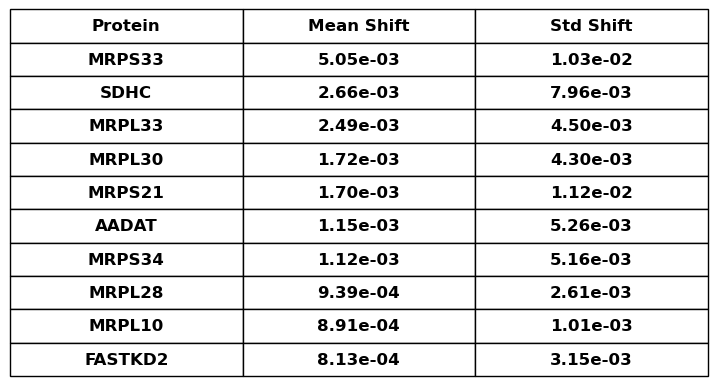

In [23]:
import matplotlib.pyplot as plt
import numpy as np

cell_text = top10.applymap(lambda x: f"{x:.2e}" if isinstance(x, (int, float, np.floating)) else x)

# Set figure and axis
fig, ax = plt.subplots(figsize=(9, 3))
ax.axis('off')  # Hide axes

# Create table with formatted text
table = ax.table(cellText=cell_text.values,
                 colLabels=top10.columns,
                 cellLoc='center',
                 loc='center')

# Style
table.scale(1, 2.0)
table.auto_set_font_size(False)
table.set_fontsize(12)

# Bold all cells (headers + values)
for _, cell in table.get_celld().items():
    cell.set_text_props(fontweight='bold')

# Save as high-resolution PNG
plt.savefig("Figures/top10_shifted_proteins_bold.png", dpi=600,
            bbox_inches='tight', transparent=True)
plt.show()

/tmp/ipykernel_3283681/3410148651.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
/tmp/ipykernel_3283681/3410148651.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')
/tmp/ipykernel_3283681/3410148651.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
/tmp/ipykernel_3283681/3410148651.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')
/tmp/ipykernel_3283681/3410148651.py:31: UserWarning: set_ticklabels() shoul

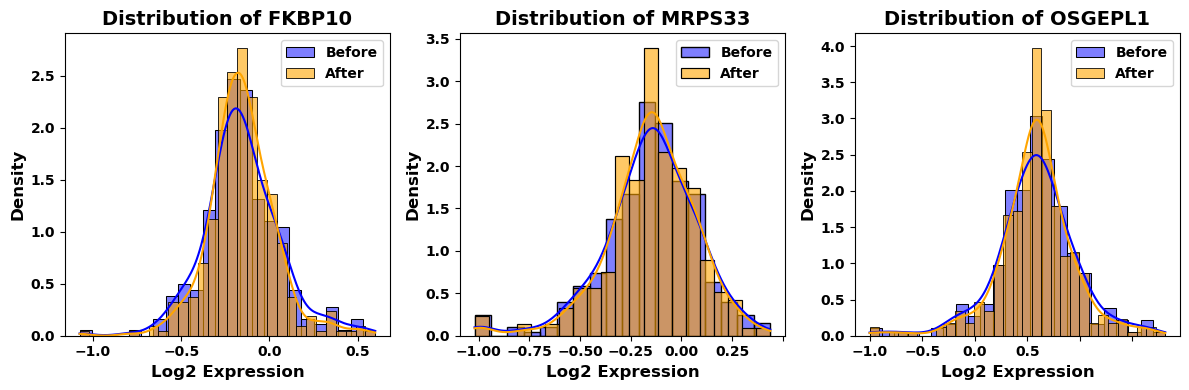

In [24]:
# Step 1: Identify proteins with >15% missing values
missing_pct = data.isna().mean()
high_missing_proteins = missing_pct[missing_pct > 0.15].index.tolist()

# Step 2: Plot histograms before and after imputation for each
def plot_side_by_side(data, data_imputed, protein_list, save_path="imputed_distributions.png", dpi=600):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import math

    n = len(protein_list)
    cols = 3
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))

    for i, protein in enumerate(protein_list):
        ax = axes.flat[i]
        sns.histplot(data[protein], label='Before', color='blue', kde=True, stat="density", ax=ax)
        sns.histplot(data_imputed[protein], label='After', color='orange', kde=True, stat="density", ax=ax, alpha=0.6)
        ax.set_title(f"Distribution of {protein}", fontsize = 14, fontweight = 'bold')
        ax.set_xlabel("Log2 Expression", fontsize=12, fontweight='bold')
        ax.set_ylabel("Density",fontsize=12, fontweight='bold')
        
        legend = ax.legend()
        for text in legend.get_texts():
            text.set_fontweight('bold')
            text.set_fontsize(10)
        # Bold axis tick values
        ax.tick_params(axis='both', labelsize=10)
        ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
        ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')

    # Hide unused subplots if n is odd
    for j in range(i+1, len(axes.flat)):
        axes.flat[j].set_visible(False)

    plt.tight_layout()
    plt.savefig(save_path, dpi=dpi, bbox_inches='tight')  # Save with high resolution
    plt.show()

plot_side_by_side(data, data_imputed, high_missing_proteins, save_path="Figures/high_missing_protein_histograms_greater_than_15percent.png", dpi=600)





In [25]:
from sklearn.feature_selection import SelectFromModel, RFE, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
import pandas as pd
import numpy as np
import shap
import joblib

In [26]:
# Goal: Use 4 different feature selection methods to compare what they pick
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Placeholder for final results
all_selected = {}
all_scores = {}

# Common classifier
clf = LogisticRegression(max_iter=1000, solver='liblinear')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)



# 1. Random Forest-based selection
#rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=5, random_state=42)
sfm_rf = SelectFromModel(rf, threshold="1.5*median")


sfm_rf.fit(data_imputed, y)
rf_selected = data_imputed.columns[sfm_rf.get_support()]
X_rf = data_imputed[rf_selected]
X_rf = scaler.fit_transform(X_rf)

scores_rf = cross_validate(clf, X_rf, y, scoring={'auc': 'roc_auc', 'accuracy': 'accuracy'}, cv=cv, return_train_score=True)
all_selected['RandomForest'] = rf_selected
all_scores['RandomForest'] = scores_rf

# 2. Gradient Boosting-based selection
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, subsample=0.8, random_state=42)
sfm_gb = SelectFromModel(gb)
sfm_gb.fit(data_imputed, y)
gb_selected = data_imputed.columns[sfm_gb.get_support()]
X_gb = data_imputed[gb_selected]
X_gb = scaler.fit_transform(X_gb)

scores_gb = cross_validate(clf, X_gb, y, scoring={'auc': 'roc_auc', 'accuracy': 'accuracy'}, cv=cv, return_train_score=True)
all_selected['GradientBoosting'] = gb_selected
all_scores['GradientBoosting'] = scores_gb

# 3. Recursive Feature Elimination (RFE)
rfe = RFECV(estimator=clf, step=1, cv=cv, scoring='roc_auc', n_jobs=-1)
rfe.fit(data_imputed, y)
optimal_features = rfe.n_features_
rfe_selected = data_imputed.columns[rfe.support_]
X_rfe = data_imputed[rfe_selected]
X_rfe = scaler.fit_transform(X_rfe)

scores_rfe = cross_validate(clf, X_rfe, y, scoring={'auc': 'roc_auc', 'accuracy': 'accuracy'}, cv=cv, return_train_score=True)
all_selected['RFE'] = rfe_selected
all_scores['RFE'] = scores_rfe


# 4. LASSO with CV
lasso = LassoCV(cv=5, random_state=42, max_iter=5000)
lasso.fit(data_imputed, y)
lasso_selector = SelectFromModel(lasso, prefit=True)
lasso_selected = data_imputed.columns[lasso_selector.get_support()]
X_lasso = data_imputed[lasso_selected]
X_lasso = scaler.fit_transform(X_lasso)
scores_lasso = cross_validate(clf, X_lasso, y, scoring={'auc': 'roc_auc', 'accuracy': 'accuracy'}, cv=cv, return_train_score=True)
all_selected['LassoCV'] = lasso_selected
all_scores['LassoCV'] = scores_lasso

# Save each list of selected proteins
for method, features in all_selected.items():
    features.to_series().to_csv(f"selected_proteins_scaled_testing_{method}.csv", index=False)
    print(f"{method}: {len(features)} proteins selected and saved to CSV.")

# Printing performance
for method, scores in all_scores.items():
    train_auc = scores['train_auc'].mean()
    val_auc = scores['test_auc'].mean()
    auc_gap = train_auc - val_auc
    acc = scores['test_accuracy'].mean()
    print(f"\n{method}:")
    print(f"  Features selected: {len(all_selected[method])}")
    print(f"  Train AUC: {train_auc:.4f} ± {scores['train_auc'].std():.4f}")
    print(f"  Val AUC:   {val_auc:.4f} ± {scores['test_auc'].std():.4f}")
    print(f"  AUC Gap:   {auc_gap:.4f}")
    print(f"  Val Accuracy: {acc:.4f} ± {scores['test_accuracy'].std():.4f}")

# Printing overlaps
all_sets = [set(v) for v in all_selected.values()]
common = set.intersection(*all_sets)
print(f"\nProteins selected by ALL 4 methods: {len(common)}")
print(sorted(list(common)))

# Evaluating model on common features
if len(common) > 0:
    X_common = data_imputed[list(common)]
    scores_common = cross_validate(clf, X_common, y, scoring={'auc': 'roc_auc', 'accuracy': 'accuracy'}, cv=cv, return_train_score=True)
    train_auc_common = scores_common['train_auc'].mean()
    val_auc_common = scores_common['test_auc'].mean()
    auc_gap_common = train_auc_common - val_auc_common
    val_acc_common = scores_common['test_accuracy'].mean()

    print("\nModel using COMMON features selected by all 4 methods:")
    print(f"  Features used: {len(common)}")
    print(f"  Train AUC: {train_auc_common:.4f} ± {scores_common['train_auc'].std():.4f}")
    print(f"  Val AUC:   {val_auc_common:.4f} ± {scores_common['test_auc'].std():.4f}")
    print(f"  AUC Gap:   {auc_gap_common:.4f}")
    print(f"  Val Accuracy: {val_acc_common:.4f} ± {scores_common['test_accuracy'].std():.4f}")
    



RandomForest: 82 proteins selected and saved to CSV.
GradientBoosting: 69 proteins selected and saved to CSV.
RFE: 43 proteins selected and saved to CSV.
LassoCV: 28 proteins selected and saved to CSV.

RandomForest:
  Features selected: 82
  Train AUC: 0.9572 ± 0.0049
  Val AUC:   0.8224 ± 0.0570
  AUC Gap:   0.1348
  Val Accuracy: 0.7642 ± 0.0543

GradientBoosting:
  Features selected: 69
  Train AUC: 0.9489 ± 0.0064
  Val AUC:   0.8361 ± 0.0693
  AUC Gap:   0.1128
  Val Accuracy: 0.7515 ± 0.0965

RFE:
  Features selected: 43
  Train AUC: 0.9485 ± 0.0050
  Val AUC:   0.8851 ± 0.0541
  AUC Gap:   0.0634
  Val Accuracy: 0.8140 ± 0.0812

LassoCV:
  Features selected: 28
  Train AUC: 0.9094 ± 0.0051
  Val AUC:   0.8661 ± 0.0537
  AUC Gap:   0.0433
  Val Accuracy: 0.7747 ± 0.0546

Proteins selected by ALL 4 methods: 16
['BCAT2', 'BCKDHB', 'BDH1', 'CPT2', 'CROT', 'DBT', 'DHRS7B', 'DTYMK', 'FAM210A', 'FASN', 'GRHPR', 'MACROD1', 'MRPL47', 'OSGEPL1', 'SLC25A27', 'SLC25A46']

Model using COMMO

In [69]:
all_scores

{'RandomForest': {'fit_time': array([0.00368738, 0.00337648, 0.00332403, 0.00303698, 0.00334477,
         0.00303507, 0.00332904, 0.00332236, 0.00303531, 0.00302696]),
  'score_time': array([0.00350475, 0.00334048, 0.00330114, 0.00330281, 0.00330353,
         0.00328898, 0.0033052 , 0.00328255, 0.00327253, 0.00329399]),
  'test_auc': array([0.96315789, 0.88421053, 0.88888889, 0.85555556, 0.83333333,
         0.87222222, 0.74722222, 0.75833333, 0.75277778, 0.84722222]),
  'train_auc': array([0.8876619 , 0.89689843, 0.89549458, 0.89715447, 0.89871274,
         0.8945122 , 0.90199864, 0.90443767, 0.9075542 , 0.89515583]),
  'test_accuracy': array([0.87179487, 0.79487179, 0.81578947, 0.78947368, 0.76315789,
         0.71052632, 0.73684211, 0.63157895, 0.65789474, 0.84210526]),
  'train_accuracy': array([0.79883382, 0.82215743, 0.81686047, 0.82267442, 0.82848837,
         0.82267442, 0.81976744, 0.81976744, 0.8372093 , 0.81395349])},
 'GradientBoosting': {'fit_time': array([0.00446963, 0.00

In [70]:
methods = list(all_scores.keys())

# Collect metrics
train_auc = [np.mean(all_scores[m]['train_auc']) for m in methods]
val_auc = [np.mean(all_scores[m]['test_auc']) for m in methods]


val_acc = [np.mean(all_scores[m]['test_accuracy']) for m in methods]



In [71]:
# Add Combined metrics
methods.append("Combined")

train_auc.append(0.8715)


val_auc.append(0.8542)


val_acc.append(0.7825)



/tmp/ipykernel_810396/3779654833.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')


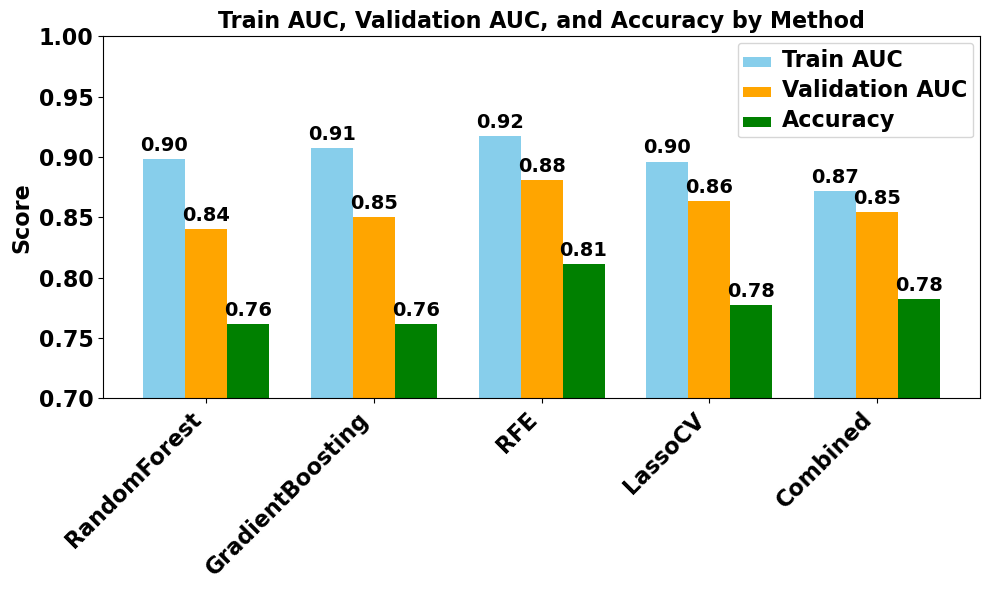

In [77]:
x = np.arange(len(methods))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, train_auc, width,  label='Train AUC', color='skyblue', capsize=5)
bar2 = ax.bar(x , val_auc, width, label='Validation AUC', color='orange', capsize=5)
bar3 = ax.bar(x + width, val_acc, width, label='Accuracy', color='green', capsize=5)

# Write values on top of each bar
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=14, fontweight='bold')

# Formatting
ax.set_ylabel('Score', fontsize=16, fontweight='bold')
ax.set_title('Train AUC, Validation AUC, and Accuracy by Method', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=45, ha='right', fontsize=16, fontweight='bold')
ax.legend(fontsize=16, frameon=False)
ax.set_ylim(0.7, 1.0)

# Bold Y-tick labels
ax.tick_params(axis='y', labelsize=16)
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    
legend = ax.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')
    text.set_fontsize(16)
        # Bold axis tick values
ax.tick_params(axis='both', labelsize=16)
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')


plt.tight_layout()
plt.savefig("Figures/AUC_comparison_with_combined_bold.png", dpi=600)
plt.show()



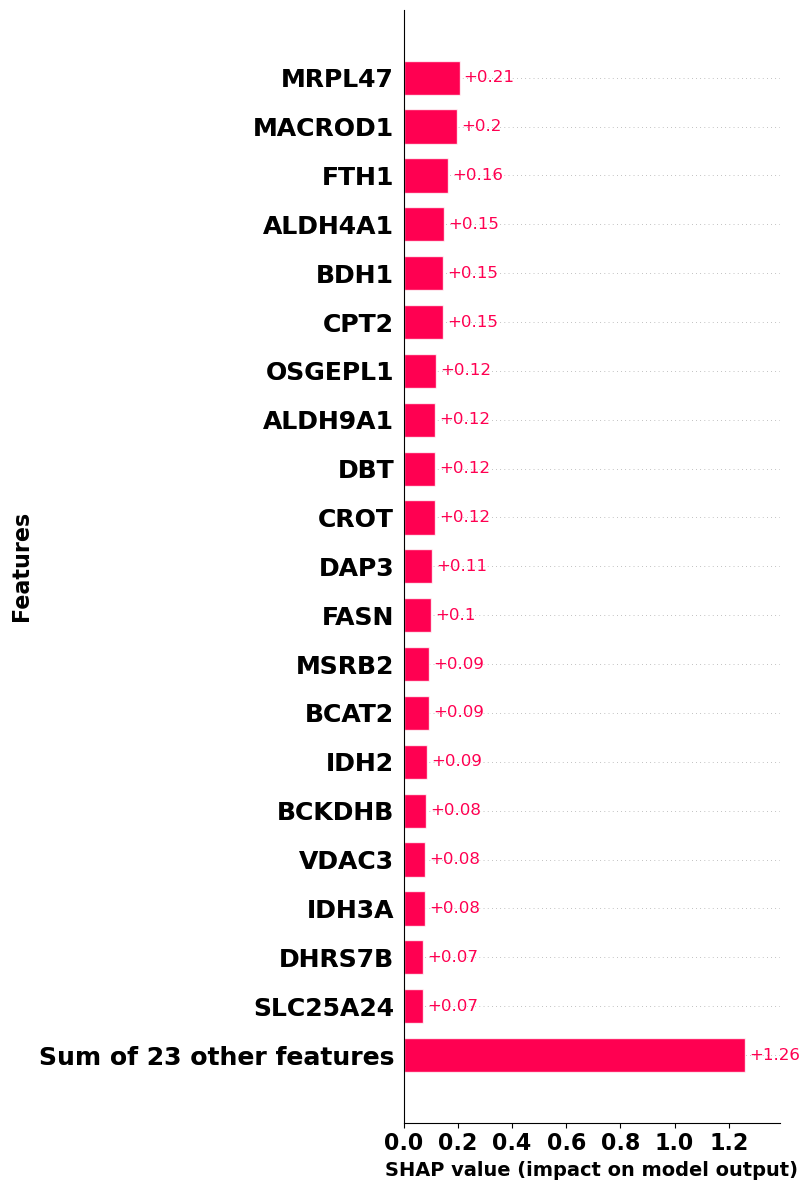

In [78]:
# SHAP interpretation for RFE model
clf.fit(X_rfe, y)
explainer = shap.Explainer(clf, X_rfe)
shap_values = explainer(X_rfe)
# Generate the beeswarm plot
shap.plots.bar(shap_values, max_display=21, show=False)  # Prevent auto-show

# Bolden all fonts
#plt.title("SHAP Summary Plot (Top 20 RFE Features)", fontsize=16, fontweight='bold')
plt.xlabel("SHAP value (impact on model output)", fontsize=14, fontweight='bold')
plt.ylabel("Features", fontsize=16, fontweight='bold')

plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')

# Save high-res figure
plt.tight_layout()
plt.savefig("Figures/SHAP_beeswarm_rfe_bold_18.png", dpi=600)
plt.show()


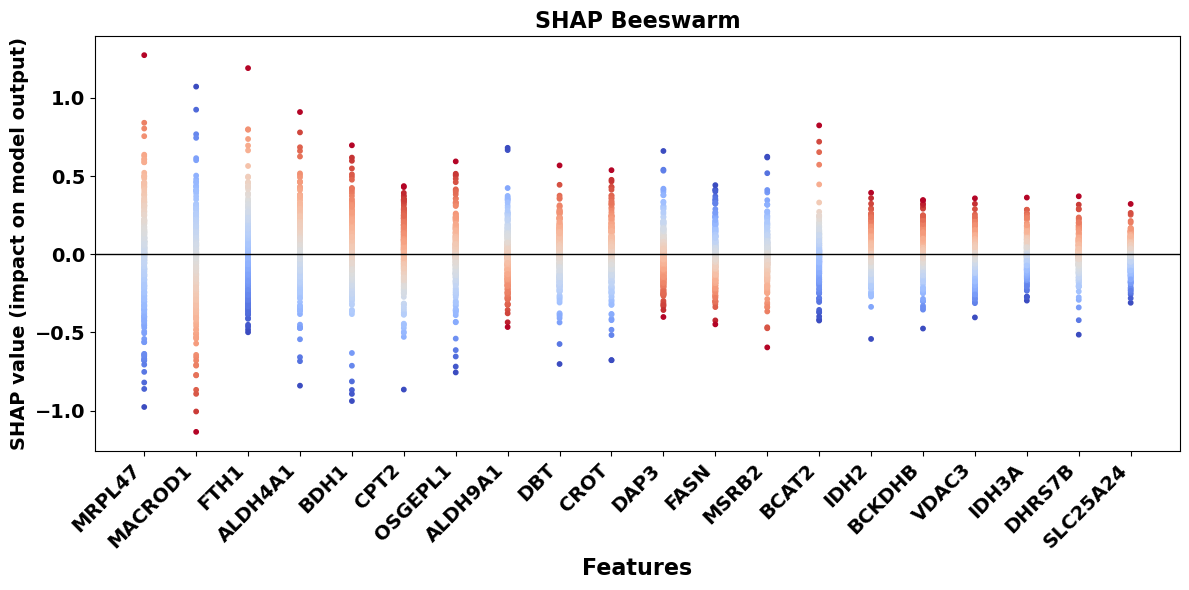

In [66]:
import numpy as np
import matplotlib.pyplot as plt


values = shap_values.values                    # (n_samples, n_features)
data   = shap_values.data
names  = np.array(shap_values.feature_names)

# ---- match beeswarm's selection rule ----
max_display = 21                               # same as your beeswarm call
top_k = min(values.shape[1], max_display - 1)  # exclude "Sum of other features"

mean_abs = np.mean(np.abs(values), axis=0)
order_all = np.argsort(mean_abs)[::-1]         # descending by mean(|SHAP|)
top_idx = order_all[:top_k]
top_names = names[top_idx]

# ---- manual scatter using the SAME features & order ----
plt.figure(figsize=(12, 6))



for j, fidx in enumerate(top_idx):
    # one categorical x per feature (keeps our order)
    x = [top_names[j]] * values.shape[0]
    plt.scatter(
        x, values[:, fidx],
        s=10, alpha=1,
        c=data[:, fidx], cmap="coolwarm"
    )

plt.axhline(0, color="black", linewidth=1)
plt.ylabel("SHAP value (impact on model output)", fontsize=14, fontweight="bold")
plt.xlabel("Features", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=14, fontweight="bold")
plt.yticks(fontsize=14, fontweight="bold")
plt.title("SHAP Beeswarm", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.savefig("Figures/SHAP_beeswarm_flipped_(manual) — same top-k as SHAP.png", dpi=600)
plt.show()



Optimal number of features: 43
Selected features saved: ['AIFM3', 'ALDH4A1', 'ALDH9A1', 'BCAT2', 'BCKDHB', 'BDH1', 'COX15', 'CPT2', 'CROT', 'DAP3', 'DBT', 'DHRS7B', 'DTYMK', 'FAM210A', 'FASN', 'FIS1', 'FLAD1', 'FTH1', 'GRHPR', 'HTRA2', 'IDH2', 'IDH3A', 'LETMD1', 'LYPLA1', 'MACROD1', 'MRPL47', 'MSRB2', 'NDUFA6', 'OCIAD1', 'OPA1', 'OSGEPL1', 'OXSM', 'PGS1', 'PICK1', 'PREPL', 'PTRH2', 'SLC25A24', 'SLC25A27', 'SLC25A36', 'SLC25A46', 'TAMM41', 'UQCRFS1', 'VDAC3']


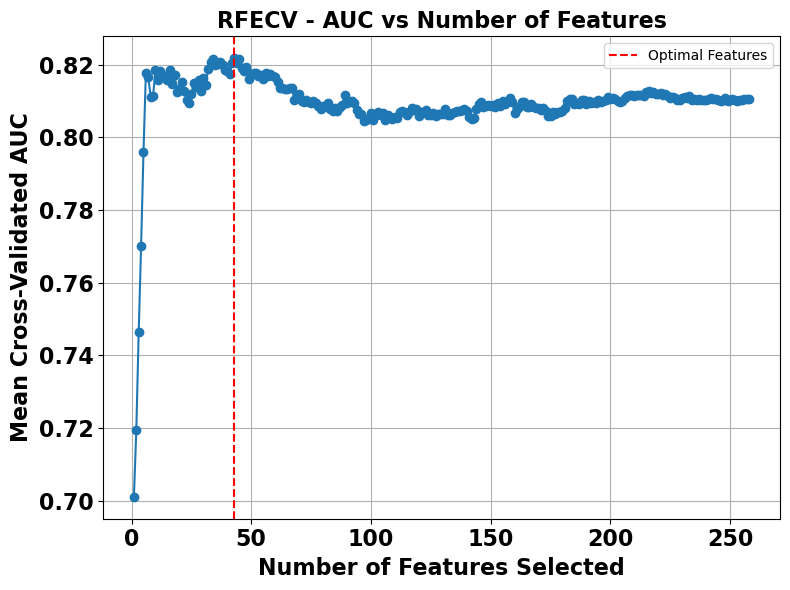

In [80]:
from sklearn.feature_selection import RFECV


# Run RFECV
rfecv = RFECV(estimator=clf, step=1, cv=cv,
              scoring='roc_auc', n_jobs=-1)
rfecv.fit(data_imputed, y)

# Get results
optimal_features = rfecv.n_features_
selected_features = data_imputed.columns[rfecv.support_]
X_rfecv = data_imputed[selected_features]

print(f"\nOptimal number of features: {optimal_features}")
print(f"Selected features saved: {list(selected_features)}")

# Plot: AUC vs number of features
plt.figure(figsize=(8,6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
         rfecv.cv_results_['mean_test_score'], marker='o')
plt.axvline(x=optimal_features, color='red', linestyle='--', label='Optimal Features')
plt.title('RFECV - AUC vs Number of Features',fontsize=16, fontweight="bold" )
plt.xlabel('Number of Features Selected', fontsize=16, fontweight="bold")
plt.ylabel('Mean Cross-Validated AUC', fontsize=16, fontweight="bold")
plt.xticks(fontsize=16, fontweight="bold")
plt.yticks(fontsize=16, fontweight="bold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Figures/RFE_features.png", dpi=600)
plt.show()
